In [55]:
import pandas as pd
import seaborn as sns
import os 

In [56]:
os.chdir('/Users/venkat/Documents')

In [57]:
# Accessing the dataset that provides details about CO2 emissions
co2_data = pd.read_csv('co2_emission.csv')

In [58]:
# Focusing on data in America specifically
us_data = co2_data[co2_data['Code']=='USA']

In [59]:
us_data.iloc[49:]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
19710,United States,USA,1800,2.528160e+05
19711,United States,USA,1801,2.674720e+05
19712,United States,USA,1802,2.894560e+05
19713,United States,USA,1803,2.967840e+05
19714,United States,USA,1804,3.334240e+05
...,...,...,...,...
19923,United States,USA,2013,5.519613e+09
19924,United States,USA,2014,5.568759e+09
19925,United States,USA,2015,5.420804e+09
19926,United States,USA,2016,5.310861e+09


In [103]:
small_us = us_data.iloc[49:]

In [104]:
small_us[['Year', 'Annual CO₂ emissions (tonnes )']][::5]

,Year,Annual CO₂ emissions (tonnes )
19710,1800,2.528160e+05
19715,1805,3.407520e+05
19720,1810,4.176960e+05
19725,1815,6.008960e+05
19730,1820,7.914240e+05
19735,1825,1.135840e+06
19740,1830,2.088480e+06
19745,1835,4.316192e+06
19750,1840,5.873392e+06
19755,1845,1.120451e+07


In [105]:
# Avoids data points that have a y value of 0.0
X = small_us['Year']
y = small_us['Annual CO₂ emissions (tonnes )']

In [123]:
# splitting the data so 75% is used to train the model and the rest is used to test it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 41)

In [124]:
# Although the model is much better, it does not seem to be the best one
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor(n_estimators = 100, max_depth=None, random_state=0)
# Changing the series value to a DataFrame for model fitting to work
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
rg.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [125]:
pred3 = rg.predict(X_test)

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Annual CO₂ emissions (tonnes )'>

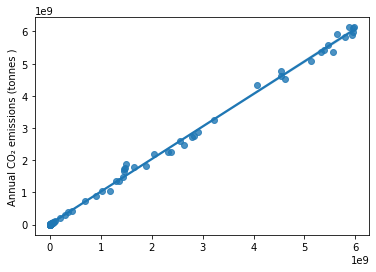

In [126]:
sns.regplot(pred3, y_test) 


In [127]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred3, y_test)

69101848.86833335

In [128]:
# Random Forest Regressor IS NOT ideal for predicting future values

In [130]:
# I will try a different approach
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [131]:
#Tests different parameters to see which makes the most accurate predictions
param_grid = {
    "C": [7000, 10000, 100000],
    "epsilon": [0.0001, 0.01],
    "kernel" : ['linear', 'rbf', 'sigmoid'],
    "gamma" : ["scale", "auto"]
    
}

In [132]:
# Split the data into 5 parts
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

In [133]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [7000, 10000, 100000], 'epsilon': [0.0001, 0.01],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [134]:
grid_search.best_params_

{'C': 100000, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [135]:
gr_p = grid_search.predict(X_test)

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Annual CO₂ emissions (tonnes )'>

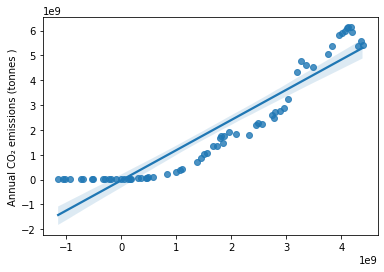

In [136]:
sns.regplot(gr_p, y_test)

In [137]:
mean_absolute_error(gr_p, y_test)

662298682.6181298

In [25]:
X.shape

(218,)

In [26]:
x_val = np.linspace(1800, 2017, 218)
y_val = 1.01374**(x_val) * 0.00700511
y_val2 = 1.015034 **(x_val)*0.0005431546

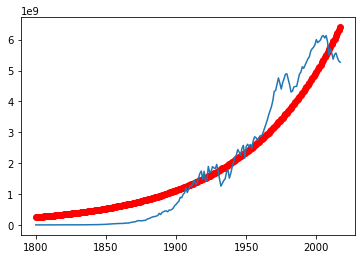

In [27]:
import matplotlib.pyplot as plt
plt.plot(small_us['Year'], small_us['Annual CO₂ emissions (tonnes )'])
plt.scatter(x_val, y_val2, color='red')


In [33]:
# The second equation makes better predictions
mean_absolute_error(y_val2, y)

470290464.4495564

Fitted parameters: a = 1.932e+08, b = 0.01672


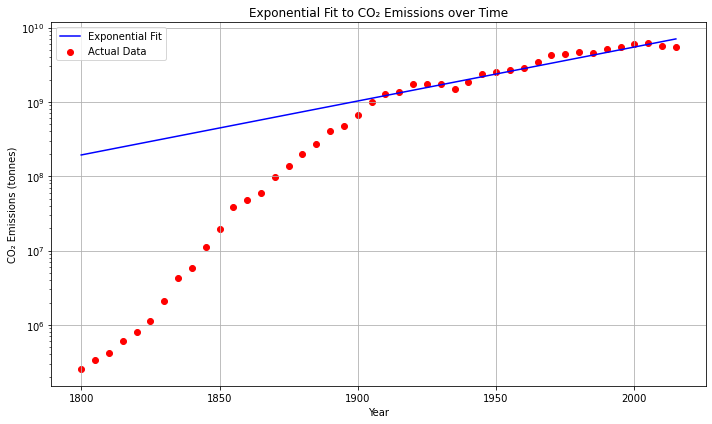

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Raw data (Year and Emissions)
year = np.array([
    1800, 1805, 1810, 1815, 1820, 1825, 1830, 1835, 1840, 1845,
    1850, 1855, 1860, 1865, 1870, 1875, 1880, 1885, 1890, 1895,
    1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945,
    1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995,
    2000, 2005, 2010, 2015
])

emissions = np.array([
    2.528160e+05, 3.407520e+05, 4.176960e+05, 6.008960e+05, 7.914240e+05,
    1.135840e+06, 2.088480e+06, 4.316192e+06, 5.873392e+06, 1.120451e+07,
    1.979293e+07, 3.816056e+07, 4.743781e+07, 5.882186e+07, 9.862022e+07,
    1.357475e+08, 1.986841e+08, 2.721619e+08, 4.017466e+08, 4.799474e+08,
    6.627370e+08, 9.844985e+08, 1.269228e+09, 1.365269e+09, 1.735890e+09,
    1.740898e+09, 1.742210e+09, 1.490262e+09, 1.871491e+09, 2.355340e+09,
    2.535942e+09, 2.721722e+09, 2.887820e+09, 3.388193e+09, 4.325501e+09,
    4.400795e+09, 4.716716e+09, 4.484338e+09, 5.121264e+09, 5.439213e+09,
    6.000606e+09, 6.132006e+09, 5.701076e+09, 5.420804e+09
])

# Define the exponential model
def exp_model(x, a, b):
    return a * np.exp(b * x)

# Normalize years to avoid numerical overflow in exp
x_norm = year - year.min()  # start from 0

# Fit the exponential model
params, _ = curve_fit(exp_model, x_norm, emissions, p0=(1e5, 0.03))
a_fit, b_fit = params

# Predict using the fitted model
y_pred = exp_model(x_norm, a_fit, b_fit)

# Print results
print(f"Fitted parameters: a = {a_fit:.3e}, b = {b_fit:.5f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(year, emissions, label='Actual Data', color='red')
plt.plot(year, y_pred, label='Exponential Fit', color='blue')
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (tonnes)")
plt.title("Exponential Fit to CO₂ Emissions over Time")
plt.legend()
plt.yscale("log")  # Optional: log scale to better see growth
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
mean_absolute_error(y_pred, emissions)

389441545.4045508

In [67]:
# Shuffling the rows so that we can use 70% of the data randomly
small_us_shuffle = small_us.sample(frac=1, random_state=42).reset_index(drop=True)
0.7 * 218 # We want about 152 rows

152.6

In [85]:
# The shuffling is a bit unnecessary, so we can stick to the model above

Fitted parameters: a = 1.932e+08, b = 0.01672
R² score: 0.9448


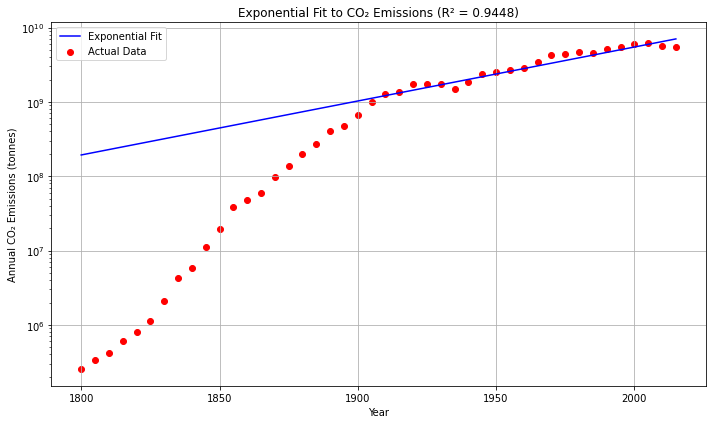

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Data
years = np.array([
    1800, 1805, 1810, 1815, 1820, 1825, 1830, 1835, 1840, 1845,
    1850, 1855, 1860, 1865, 1870, 1875, 1880, 1885, 1890, 1895,
    1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945,
    1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995,
    2000, 2005, 2010, 2015
])

emissions = np.array([
    2.528160e+05, 3.407520e+05, 4.176960e+05, 6.008960e+05, 7.914240e+05,
    1.135840e+06, 2.088480e+06, 4.316192e+06, 5.873392e+06, 1.120451e+07,
    1.979293e+07, 3.816056e+07, 4.743781e+07, 5.882186e+07, 9.862022e+07,
    1.357475e+08, 1.986841e+08, 2.721619e+08, 4.017466e+08, 4.799474e+08,
    6.627370e+08, 9.844985e+08, 1.269228e+09, 1.365269e+09, 1.735890e+09,
    1.740898e+09, 1.742210e+09, 1.490262e+09, 1.871491e+09, 2.355340e+09,
    2.535942e+09, 2.721722e+09, 2.887820e+09, 3.388193e+09, 4.325501e+09,
    4.400795e+09, 4.716716e+09, 4.484338e+09, 5.121264e+09, 5.439213e+09,
    6.000606e+09, 6.132006e+09, 5.701076e+09, 5.420804e+09
])

# Normalize years
x_norm = years - years.min()

# Exponential model
def exp_model(x, a, b):
    return a * np.exp(b * x)

# Fit model
params, _ = curve_fit(exp_model, x_norm, emissions, p0=(1e5, 0.03))
a_fit, b_fit = params
predictions = exp_model(x_norm, a_fit, b_fit)

# R² score
r2 = r2_score(emissions, predictions)
print(f"Fitted parameters: a = {a_fit:.3e}, b = {b_fit:.5f}")
print(f"R² score: {r2:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(years, emissions, color='red', label='Actual Data')
plt.plot(years, predictions, color='blue', label='Exponential Fit')
plt.xlabel("Year")
plt.ylabel("Annual CO₂ Emissions (tonnes)")
plt.title(f"Exponential Fit to CO₂ Emissions (R² = {r2:.4f})")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [92]:
# This is the same model as above and it isn't the best
mean_absolute_error(predictions, emissions)

389441545.4045508

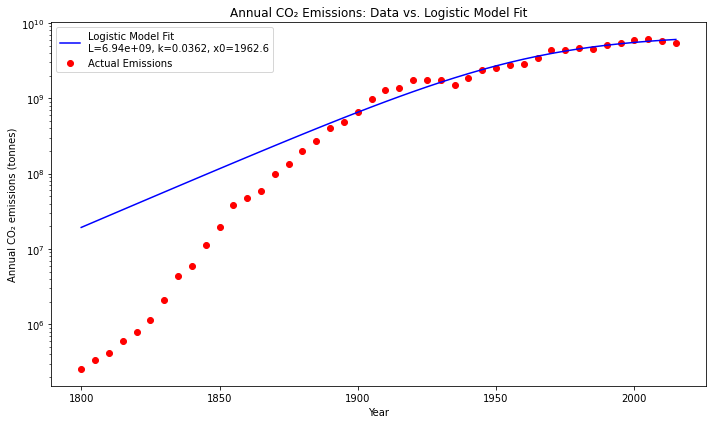

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Years and emissions (copy the 'years' and 'y' columns from your dataset in correct order, skipping indices)
years = np.array([
    1800,1805,1810,1815,1820,1825,1830,1835,1840,1845,
    1850,1855,1860,1865,1870,1875,1880,1885,1890,1895,
    1900,1905,1910,1915,1920,1925,1930,1935,1940,1945,
    1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,
    2000,2005,2010,2015
])
emissions = np.array([
    2.528160e+05,3.407520e+05,4.176960e+05,6.008960e+05,7.914240e+05,1.135840e+06,
    2.088480e+06,4.316192e+06,5.873392e+06,1.120451e+07,1.979293e+07,3.816056e+07,
    4.743781e+07,5.882186e+07,9.862022e+07,1.357475e+08,1.986841e+08,2.721619e+08,
    4.017466e+08,4.799474e+08,6.627370e+08,9.844985e+08,1.269228e+09,1.365269e+09,
    1.735890e+09,1.740898e+09,1.742210e+09,1.490262e+09,1.871491e+09,2.355340e+09,
    2.535942e+09,2.721722e+09,2.887820e+09,3.388193e+09,4.325501e+09,4.400795e+09,
    4.716716e+09,4.484338e+09,5.121264e+09,5.439213e+09,6.000606e+09,6.132006e+09,
    5.701076e+09,5.420804e+09
])

# Logistic model: y = L / (1 + np.exp(-k*(x-x0)))
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Reasonable initial guesses for the parameters:
L_guess = max(emissions)*1.2
k_guess = 0.04
x0_guess = 1950
p0 = [L_guess, k_guess, x0_guess]

params, _ = curve_fit(logistic, years, emissions, p0)
L, k, x0 = params

# Model predictions
model_preds = logistic(years, L, k, x0)

plt.figure(figsize=(10,6))
plt.scatter(years, emissions, c='red', label='Actual Emissions')
plt.plot(years, model_preds, label=f'Logistic Model Fit\nL={L:2.2e}, k={k:2.4f}, x0={x0:2.1f}', color='blue')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions (tonnes)')
plt.title('Annual CO₂ Emissions: Data vs. Logistic Model Fit')
plt.legend()
plt.yscale('log')  # log scale highlights fit over wide range
plt.tight_layout()
plt.show()


In [93]:
mean_absolute_error(model_preds, emissions)
# This value is much better!

185984195.9479619

In [141]:
# This Logistic Model is the best so far that works - only about 185,984,196 tons away from the actual values
185984195.9479619/6052236000
# Only about 3% of the data, so not too bad


0.03072983207329686

In [166]:
# Creating a new array with future years
new_array = pd.DataFrame([2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100, 2110, 2120, 2130, 2140, 2150, 2160, 2170, 2180, 2190, 2200, 2210, 2220])

new_array

all_val = pd.DataFrame([i for i in range(2030, 2220)])


In [167]:
modelnew_pred = logistic(new_array, L, k, x0)

Text(0.5, 1.0, 'Predicted Future USA CO2 Emissions')

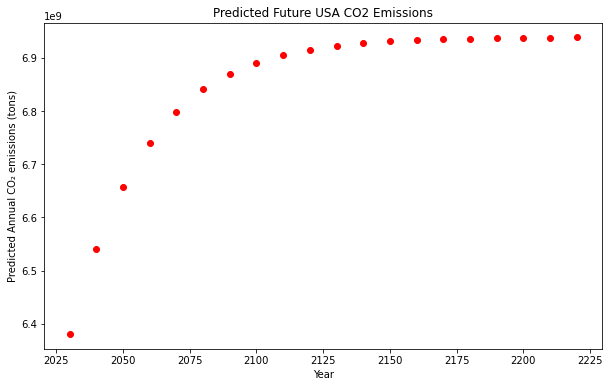

In [168]:
# Here are the model's predictions
plt.figure(figsize=(10,6))
plt.scatter(new_array, modelnew_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Predicted Annual CO₂ emissions (tons)')
plt.title('Predicted Future USA CO2 Emissions')

In [170]:
modelnew_pred

,0
0,6.381119e+09
1,6.540634e+09
2,6.656528e+09
3,6.739702e+09
4,6.798869e+09
5,6.840695e+09
6,6.870131e+09
7,6.890783e+09
8,6.905240e+09
9,6.915345e+09


In [171]:
new_array

,0
0,2030
1,2040
2,2050
3,2060
4,2070
5,2080
6,2090
7,2100
8,2110
9,2120
